<a href="https://colab.research.google.com/github/mertege/FMCW-Data-Classification-/blob/main/FMCW_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bu versiyonda data'lar normalize edildi.

In [1]:
import numpy as np
from keras.preprocessing import sequence
import scipy.io
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten,Input, Lambda, Activation, Concatenate, LSTM, Embedding, Bidirectional, GRU, BatchNormalization, LayerNormalization, Normalization
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import layers, regularizers
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from tensorflow import keras

In [ ]:
pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 97 kB 3.7 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_data = scipy.io.loadmat('/content/drive/MyDrive/training_data.mat')
training_label = scipy.io.loadmat('/content/drive/MyDrive/training_label.mat')
testing_data = scipy.io.loadmat('/content/drive/MyDrive/testing_data.mat')
testing_label = scipy.io.loadmat('/content/drive/MyDrive/testing_label.mat')
validation_data = scipy.io.loadmat('/content/drive/MyDrive/validation_data.mat')
validation_label = scipy.io.loadmat('/content/drive/MyDrive/validation_label.mat')
training_and_val_data = scipy.io.loadmat('/content/drive/MyDrive/training_and_val_data.mat')
training_and_val_label = scipy.io.loadmat('/content/drive/MyDrive/training_and_val_label.mat') 
trainingdata_reshaped = scipy.io.loadmat('/content/drive/MyDrive/trainingdata_reshaped.mat')
traininglabel_reshaped = scipy.io.loadmat('/content/drive/MyDrive/traininglabel_reshaped.mat') 
validation_data_reshaped = scipy.io.loadmat('/content/drive/MyDrive/validation_data_reshaped.mat')
validation_label_reshaped = scipy.io.loadmat('/content/drive/MyDrive/validation_label_reshaped.mat') 
test_data_reshaped = scipy.io.loadmat('/content/drive/MyDrive/test_data_reshaped.mat')
test_label_reshaped = scipy.io.loadmat('/content/drive/MyDrive/test_label_reshaped.mat') 
sorted(training_label.keys())

['__globals__', '__header__', '__version__', 'training_label']

In [4]:
# Convert mat. data to ndarray
training_dataset = training_data['training_data']
training_labelset = training_label['training_label']
testing_dataset = testing_data['testing_data']
testing_label = testing_label['testing_label']
validation_dataset = validation_data['validation_data']
validation_label = validation_label['validation_label']
trainingdata_reshaped = trainingdata_reshaped['trainingdata_reshaped']
traininglabel_reshaped = traininglabel_reshaped['traininglabel_reshaped']
validation_data_reshaped = validation_data_reshaped['validation_data_reshaped']
validation_label_reshaped = validation_label_reshaped['validation_label_reshaped']
test_data_reshaped = test_data_reshaped['test_data_reshaped']
test_label_reshaped = test_label_reshaped['test_label_reshaped']
print(validation_label.shape)

(20, 1)


In [5]:
X_train1 = training_dataset[:,1,:]
X_train2 = training_dataset[:,2,:]
X_train3 = training_dataset[:,3,:]
X_train4 = training_dataset[:,4,:]
X_train5 = training_dataset[:,5,:]
X_train6 = training_dataset[:,6,:]
X_train7 = training_dataset[:,7,:]
X_train8 = training_dataset[:,8,:]
X_train9 = training_dataset[:,9,:]
X_train10 = training_dataset[:,10,:]
X_train11 = training_dataset[:,11,:]
X_train12 = training_dataset[:,12,:]
X_train13 = training_dataset[:,13,:]
X_train14 = training_dataset[:,14,:]
X_train15 = training_dataset[:,0,:]

y_train = training_labelset[:,0]

trainingdata_reshaped1 = trainingdata_reshaped[:,1,:]
trainingdata_reshaped2 = trainingdata_reshaped[:,2,:]
trainingdata_reshaped3 = trainingdata_reshaped[:,3,:]
trainingdata_reshaped4 = trainingdata_reshaped[:,4,:]
trainingdata_reshaped5 = trainingdata_reshaped[:,5,:]
trainingdata_reshaped6 = trainingdata_reshaped[:,6,:]
trainingdata_reshaped7 = trainingdata_reshaped[:,7,:]
trainingdata_reshaped8 = trainingdata_reshaped[:,8,:]
trainingdata_reshaped9 = trainingdata_reshaped[:,9,:]
trainingdata_reshaped10 = trainingdata_reshaped[:,10,:]
trainingdata_reshaped11 = trainingdata_reshaped[:,11,:]
trainingdata_reshaped12 = trainingdata_reshaped[:,12,:]
trainingdata_reshaped13 = trainingdata_reshaped[:,13,:]
trainingdata_reshaped14 = trainingdata_reshaped[:,14,:]
trainingdata_reshaped15 = trainingdata_reshaped[:,0,:]

y_train_reshaped = traininglabel_reshaped[:,0]

X_val1 = validation_dataset[:,1,:]
X_val2 = validation_dataset[:,2,:]
X_val3 = validation_dataset[:,3,:]
X_val4 = validation_dataset[:,4,:]
X_val5 = validation_dataset[:,5,:]
X_val6 = validation_dataset[:,6,:]
X_val7 = validation_dataset[:,7,:]
X_val8 = validation_dataset[:,8,:]
X_val9 = validation_dataset[:,9,:]
X_val10 = validation_dataset[:,10,:]
X_val11 = validation_dataset[:,11,:]
X_val12 = validation_dataset[:,12,:]
X_val13 = validation_dataset[:,13,:]
X_val14 = validation_dataset[:,14,:]
X_val15 = validation_dataset[:,0,:]

y_val = validation_label[:,0]

validation_data_reshaped1 = validation_data_reshaped[:,1,:]
validation_data_reshaped2 = validation_data_reshaped[:,2,:]
validation_data_reshaped3 = validation_data_reshaped[:,3,:]
validation_data_reshaped4 = validation_data_reshaped[:,4,:]
validation_data_reshaped5 = validation_data_reshaped[:,5,:]
validation_data_reshaped6 = validation_data_reshaped[:,6,:]
validation_data_reshaped7 = validation_data_reshaped[:,7,:]
validation_data_reshaped8 = validation_data_reshaped[:,8,:]
validation_data_reshaped9 = validation_data_reshaped[:,9,:]
validation_data_reshaped10 = validation_data_reshaped[:,10,:]
validation_data_reshaped11 = validation_data_reshaped[:,11,:]
validation_data_reshaped12 = validation_data_reshaped[:,12,:]
validation_data_reshaped13 = validation_data_reshaped[:,13,:]
validation_data_reshaped14 = validation_data_reshaped[:,14,:]
validation_data_reshaped15 = validation_data_reshaped[:,0,:]

y_val_reshaped = validation_label_reshaped[:,0]

X_test1 = testing_dataset[:,1,:]
X_test2 = testing_dataset[:,2,:]
X_test3 = testing_dataset[:,3,:]
X_test4 = testing_dataset[:,4,:]
X_test5 = testing_dataset[:,5,:]
X_test6 = testing_dataset[:,6,:]
X_test7 = testing_dataset[:,7,:]
X_test8 = testing_dataset[:,8,:]
X_test9 = testing_dataset[:,9,:]
X_test10 = testing_dataset[:,10,:]
X_test11 = testing_dataset[:,11,:]
X_test12 = testing_dataset[:,12,:]
X_test13 = testing_dataset[:,13,:]
X_test14 = testing_dataset[:,14,:]
X_test15 = testing_dataset[:,0,:]

y_test = testing_label[:,0]

test_data_reshaped1 = test_data_reshaped[:,1,:]
test_data_reshaped2 = test_data_reshaped[:,2,:]
test_data_reshaped3 = test_data_reshaped[:,3,:]
test_data_reshaped4 = test_data_reshaped[:,4,:]
test_data_reshaped5 = test_data_reshaped[:,5,:]
test_data_reshaped6 = test_data_reshaped[:,6,:]
test_data_reshaped7 = test_data_reshaped[:,7,:]
test_data_reshaped8 = test_data_reshaped[:,8,:]
test_data_reshaped9 = test_data_reshaped[:,9,:]
test_data_reshaped10 = test_data_reshaped[:,10,:]
test_data_reshaped11 = test_data_reshaped[:,11,:]
test_data_reshaped12 = test_data_reshaped[:,12,:]
test_data_reshaped13 = test_data_reshaped[:,13,:]
test_data_reshaped14 = test_data_reshaped[:,14,:]
test_data_reshaped15 = test_data_reshaped[:,0,:]

y_test_reshaped = test_label_reshaped[:,0]

In [6]:
std_X1 = np.std(X_train1, axis=-1)
mean_X1 = np.mean(X_train1, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train1_reshaped = (X_train1 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train2, axis=-1)
mean_X1 = np.mean(X_train2, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train2_reshaped = (X_train2 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train3, axis=-1)
mean_X1 = np.mean(X_train3, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train3_reshaped = (X_train3 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train4, axis=-1)
mean_X1 = np.mean(X_train4, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train4_reshaped = (X_train4 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train5, axis=-1)
mean_X1 = np.mean(X_train5, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train5_reshaped = (X_train5 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train6, axis=-1)
mean_X1 = np.mean(X_train6, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train6_reshaped = (X_train6 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train7, axis=-1)
mean_X1 = np.mean(X_train7, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train7_reshaped = (X_train7 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train8, axis=-1)
mean_X1 = np.mean(X_train8, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train8_reshaped = (X_train8 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train9, axis=-1)
mean_X1 = np.mean(X_train9, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train9_reshaped = (X_train9 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train10, axis=-1)
mean_X1 = np.mean(X_train10, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train10_reshaped = (X_train10 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train11, axis=-1)
mean_X1 = np.mean(X_train11, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train11_reshaped = (X_train11 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train12, axis=-1)
mean_X1 = np.mean(X_train12, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train12_reshaped = (X_train12 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train13, axis=-1)
mean_X1 = np.mean(X_train13, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train13_reshaped = (X_train13 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train14, axis=-1)
mean_X1 = np.mean(X_train14, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train14_reshaped = (X_train14 - mean_X1) / std_X1
# --
std_X1 = np.std(X_train15, axis=-1)
mean_X1 = np.mean(X_train15, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_train15_reshaped = (X_train15 - mean_X1) / std_X1
# ------------ VAL ---------------
std_X1 = np.std(X_val1, axis=-1)
mean_X1 = np.mean(X_val1, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val1_reshaped = (X_val1 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val2, axis=-1)
mean_X1 = np.mean(X_val2, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val2_reshaped = (X_val2 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val3, axis=-1)
mean_X1 = np.mean(X_val3, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val3_reshaped = (X_val3 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val4, axis=-1)
mean_X1 = np.mean(X_val4, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val4_reshaped = (X_val4 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val5, axis=-1)
mean_X1 = np.mean(X_val5, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val5_reshaped = (X_val5 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val6, axis=-1)
mean_X1 = np.mean(X_val6, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val6_reshaped = (X_val6 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val7, axis=-1)
mean_X1 = np.mean(X_val7, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val7_reshaped = (X_val7 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val8, axis=-1)
mean_X1 = np.mean(X_val8, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val8_reshaped = (X_val8 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val9, axis=-1)
mean_X1 = np.mean(X_val9, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val9_reshaped = (X_val9 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val10, axis=-1)
mean_X1 = np.mean(X_val10, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val10_reshaped = (X_val10 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val11, axis=-1)
mean_X1 = np.mean(X_val11, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val11_reshaped = (X_val11 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val12, axis=-1)
mean_X1 = np.mean(X_val12, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val12_reshaped = (X_val12 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val13, axis=-1)
mean_X1 = np.mean(X_val13, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val13_reshaped = (X_val13 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val14, axis=-1)
mean_X1 = np.mean(X_val14, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val14_reshaped = (X_val14 - mean_X1) / std_X1
# --
std_X1 = np.std(X_val15, axis=-1)
mean_X1 = np.mean(X_val15, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_val15_reshaped = (X_val15 - mean_X1) / std_X1
# ------------ Test ---------------
std_X1 = np.std(X_test1, axis=-1)
mean_X1 = np.mean(X_test1, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test1_reshaped = (X_test1 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test2, axis=-1)
mean_X1 = np.mean(X_test2, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test2_reshaped = (X_test2 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test3, axis=-1)
mean_X1 = np.mean(X_test3, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test3_reshaped = (X_test3 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test4, axis=-1)
mean_X1 = np.mean(X_test4, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test4_reshaped = (X_test4 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test5, axis=-1)
mean_X1 = np.mean(X_test5, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test5_reshaped = (X_test5 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test6, axis=-1)
mean_X1 = np.mean(X_test6, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test6_reshaped = (X_test6 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test7, axis=-1)
mean_X1 = np.mean(X_test7, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test7_reshaped = (X_test7 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test8, axis=-1)
mean_X1 = np.mean(X_test8, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test8_reshaped = (X_test8 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test9, axis=-1)
mean_X1 = np.mean(X_test9, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test9_reshaped = (X_test9 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test10, axis=-1)
mean_X1 = np.mean(X_test10, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test10_reshaped = (X_test10 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test11, axis=-1)
mean_X1 = np.mean(X_test11, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test11_reshaped = (X_test11 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test12, axis=-1)
mean_X1 = np.mean(X_test12, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test12_reshaped = (X_test12 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test13, axis=-1)
mean_X1 = np.mean(X_test13, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test13_reshaped = (X_test13 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test14, axis=-1)
mean_X1 = np.mean(X_test14, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test14_reshaped = (X_test14 - mean_X1) / std_X1
# --
std_X1 = np.std(X_test15, axis=-1)
mean_X1 = np.mean(X_test15, axis=-1)
std_X1 = std_X1[:,np.newaxis] 
mean_X1 = mean_X1[:,np.newaxis] 
X_test15_reshaped = (X_test15 - mean_X1) / std_X1

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 4225)]       0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 4225)]       0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, 4225)]       0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 4225)]       0                                            
___________________________________________________________________________________________

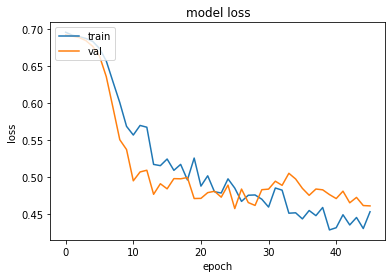

In [7]:
# FMCW Learning with Function API GRU

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

LSTM_hidden_units = 8
dense_input_unit = LSTM_hidden_units*14
top_words = 4225
max_review_length = 4225
embedding_vecor_length = 16
def summation(vects):
    x, y = vects
    return x+y
def summation_shape(shapes):
    shape1, shape2 = shapes
    return (shape1)


def create_base_network1(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network2(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network3(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network4(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
# def create_base_network5(input_shape):
 
#     input = Input(shape=input_shape)
#     x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
#     x = (Dropout(0.2))(x)
#     x = GRU(LSTM_hidden_units)(x)
#     x = (Dropout(0.2))(x)
#     return Model(input, x)

def create_base_network6(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network7(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network8(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network9(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network10(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network11(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network12(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network13(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network14(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network15(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def decoder(input_shape):
    input = Input(shape=input_shape)    
    x = (Dropout(0.2))(input)
    x = Dense(32, activation="sigmoid")(x)        # --  kernel_regularizer='l2'
    
    out = Dense(1, activation="sigmoid")(x)
    return Model(input, out)

input_shape = ((4225))
base_network1 = create_base_network1(input_shape)
base_network2 = create_base_network2(input_shape)
base_network3 = create_base_network3(input_shape)
base_network4 = create_base_network4(input_shape)
# base_network5 = create_base_network5(input_shape)
base_network6 = create_base_network6(input_shape)
base_network7 = create_base_network7(input_shape)
base_network8 = create_base_network8(input_shape)
base_network9 = create_base_network9(input_shape)
base_network10 = create_base_network10(input_shape)
base_network11 = create_base_network11(input_shape)
base_network12 = create_base_network12(input_shape)
base_network13 = create_base_network13(input_shape)
base_network14 = create_base_network14(input_shape)
base_network15 = create_base_network15(input_shape)

input_1  = Input(shape=input_shape)
input_2  = Input(shape=input_shape)
input_3  = Input(shape=input_shape)
input_4  = Input(shape=input_shape)
# input_5  = Input(shape=input_shape)
input_6  = Input(shape=input_shape)
input_7  = Input(shape=input_shape)
input_8  = Input(shape=input_shape)
input_9  = Input(shape=input_shape)
input_10 = Input(shape=input_shape)
input_11 = Input(shape=input_shape)
input_12 = Input(shape=input_shape)
input_13 = Input(shape=input_shape)
input_14 = Input(shape=input_shape)
input_15 = Input(shape=input_shape)

processed_1  = base_network1(input_1 )
processed_2  = base_network2(input_2 )
processed_3  = base_network1(input_3 )
processed_4  = base_network2(input_4 )
# processed_5  = base_network1(input_5 )
processed_6  = base_network2(input_6 )
processed_7  = base_network1(input_7 )
processed_8  = base_network2(input_8 )
processed_9  = base_network1(input_9 )
processed_10 = base_network2(input_10)
processed_11 = base_network1(input_11)
processed_12 = base_network2(input_12)
processed_13 = base_network1(input_13)
processed_14 = base_network2(input_14)
processed_15 = base_network1(input_15)


# sum_shape = X_train1.shape
# aa = Lambda(summation,
#                   output_shape=sum_shape)([processed_a, processed_b])
aa = Concatenate()([processed_1, processed_2,processed_3, processed_4, processed_6,processed_7, processed_8,processed_9, processed_10,processed_11, processed_12,processed_13, processed_14,processed_15])

base_decoder_network = decoder((dense_input_unit))
out1 = base_decoder_network(aa)
# out2 = base_decoder_network(aa)


model = Model(inputs=[input_1, input_2,input_3, input_4, input_6,input_7, input_8,input_9, input_10,input_11, input_12,input_13, input_14,input_15], outputs=[out1])       


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()
earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0,restore_best_weights=True, mode='min')

filepath_checkpoint = "mymodel"
model_checkpoint_callback =  keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath= filepath_checkpoint,
        save_weights_only=True,
        mode="min",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )

history = model.fit((X_train1_reshaped ,X_train2_reshaped ,X_train3_reshaped ,X_train4_reshaped  ,X_train6_reshaped,X_train7_reshaped ,X_train8_reshaped ,
                X_train9_reshaped ,X_train10_reshaped,X_train11_reshaped,X_train12_reshaped,X_train13_reshaped,X_train14_reshaped,X_train15_reshaped), (y_train),
                epochs=70,
                batch_size=16,
                callbacks=[earlyStopping, model_checkpoint_callback],
                validation_data=((X_val1_reshaped ,X_val2_reshaped,X_val3_reshaped ,X_val4_reshaped,X_val6_reshaped,X_val7_reshaped ,X_val8_reshaped,X_val9_reshaped ,
                X_val10_reshaped,X_val11_reshaped ,X_val12_reshaped,X_val13_reshaped ,X_val14_reshaped,X_val15_reshaped), (y_val)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
model.load_weights(filepath_checkpoint)
loss, accuracy, f1_score, precision, recall = model.evaluate((X_test1_reshaped,X_test2_reshaped,X_test3_reshaped,X_test4_reshaped,
                                                              X_test6_reshaped,X_test7_reshaped,X_test8_reshaped,X_test9_reshaped,X_test10_reshaped,X_test11_reshaped,
                                                              X_test12_reshaped,X_test13_reshaped,X_test14_reshaped,X_test15_reshaped) ,y_test, batch_size=8)
print("test loss:", loss)
print("test acc:", accuracy)
print("f1_score:", f1_score)

3/3 [==============================] - 7s 2s/step - loss: 0.6448 - accuracy: 0.6000 - f1_m: 0.3810 - precision_m: 0.4000 - recall_m: 0.4167
test loss: 0.6447846293449402
test acc: 0.6000000238418579
f1_score: 0.3809523582458496
